In [13]:
#Import my packages that I'll be using
import numpy as np
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import scipy.stats as stats

from matplotlib import pyplot as plt
%matplotlib inline

In [14]:
#Import my data set, saved as df and run the info function to see the data types
df = pd.read_csv('medical_raw_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 53 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          10000 non-null  int64  
 1   CaseOrder           10000 non-null  int64  
 2   Customer_id         10000 non-null  object 
 3   Interaction         10000 non-null  object 
 4   UID                 10000 non-null  object 
 5   City                10000 non-null  object 
 6   State               10000 non-null  object 
 7   County              10000 non-null  object 
 8   Zip                 10000 non-null  int64  
 9   Lat                 10000 non-null  float64
 10  Lng                 10000 non-null  float64
 11  Population          10000 non-null  int64  
 12  Area                10000 non-null  object 
 13  Timezone            10000 non-null  object 
 14  Job                 10000 non-null  object 
 15  Children            7412 non-null   float64
 16  Age  

## Detecting and Treating Missing Data

In [15]:
#Using the isnull and sum functions we can see there are 7 columns with missing data
df.isnull().sum()

Unnamed: 0               0
CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
A

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Overweight'}>],
       [<AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Initial_days'}>]], dtype=object)

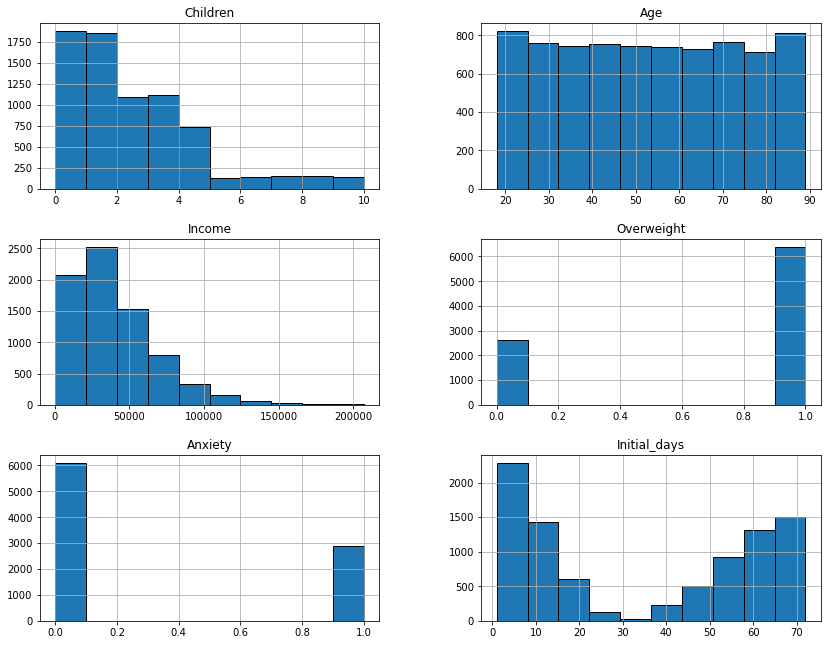

In [16]:
#Looking at the data types in info, we can see that 6 of the columns contain numeric variables and 1 contains a categorical variable
#For the column Soft_drink, which contains a categorical variable, we know we're going to use the mode for imputation
#To better see whether to use mean or median for the rest, we're going to create histograms and look at the distributions

df[['Children', 'Age', 'Income', 'Overweight', 'Anxiety', 'Initial_days']].hist(ec = "black", figsize = (14, 11))
#plt.savefig('Histograms Before Imputation.jpg')

In [17]:
#We can see that Children and Income are both skewed, so we're going to use the median for those two
#For the remaining four I'm going to impute using the mean
df['Children'].fillna(df['Children'].median(), inplace = True)
df['Income'].fillna(df['Income'].median(), inplace = True)
df['Anxiety'].fillna(df['Anxiety'].mean(), inplace = True)
df['Age'].fillna(df['Age'].mean(), inplace = True)
df['Overweight'].fillna(df['Overweight'].mean(), inplace = True)
df['Initial_days'].fillna(df['Initial_days'].mean(), inplace = True)
df['Soft_drink'] = df['Soft_drink'].fillna(df['Soft_drink'].mode()[0])

In [18]:
#Now we run isnull().sum() again to verify all the nulls were imputed
df.isnull().sum()

Unnamed: 0            0
CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
Timezone              0
Job                   0
Children              0
Age                   0
Education             0
Employment            0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
VitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services        

array([[<AxesSubplot:title={'center':'Children'}>,
        <AxesSubplot:title={'center':'Age'}>],
       [<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Overweight'}>],
       [<AxesSubplot:title={'center':'Anxiety'}>,
        <AxesSubplot:title={'center':'Initial_days'}>]], dtype=object)

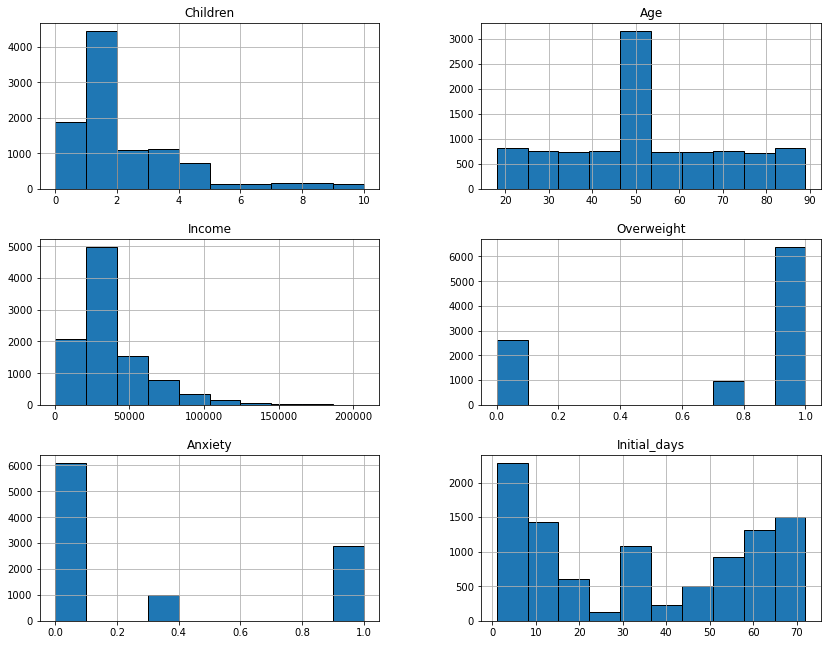

In [19]:
#Now that we no long have any null values, we'll re-create our histograms and check that the distribution hasn't changed much
df[['Children', 'Age', 'Income', 'Overweight', 'Anxiety', 'Initial_days']].hist(ec = "black", figsize = (14, 11))
#plt.savefig('Histograms After Imputation.jpg')

## Detecting and Treating Outliers

In [20]:
#To detect outliers I'm going to calculate the z-scores and make histograms of those
#I'm going to omit the anxiety and overweight columns since values that are strictly 0 and 1 won't have outliers

df['Children_Z_Scores'] = stats.zscore(df['Children'])
df['Income_Z_Scores'] = stats.zscore(df['Income'])
df['Age_Z_Scores'] = stats.zscore(df['Age'])
df['Initial_days_Z_Scores'] = stats.zscore(df['Initial_days'])

array([[<AxesSubplot:title={'center':'Children_Z_Scores'}>,
        <AxesSubplot:title={'center':'Age_Z_Scores'}>],
       [<AxesSubplot:title={'center':'Income_Z_Scores'}>,
        <AxesSubplot:title={'center':'Initial_days_Z_Scores'}>]],
      dtype=object)

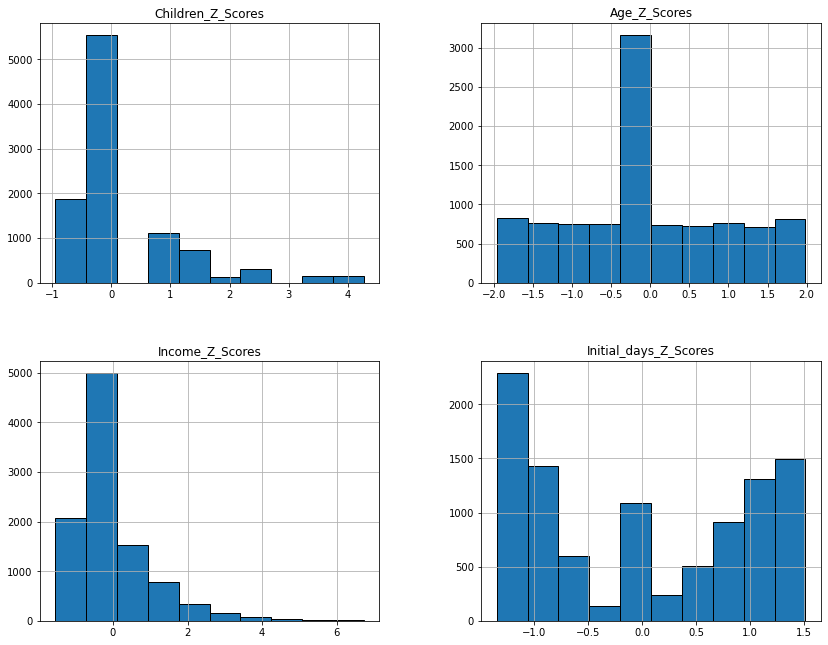

In [21]:
df[['Children_Z_Scores', 'Age_Z_Scores', 'Income_Z_Scores', 'Initial_days_Z_Scores']].hist(ec = "black", figsize = (14, 11))
#plt.savefig('Z-Scores.jpg')

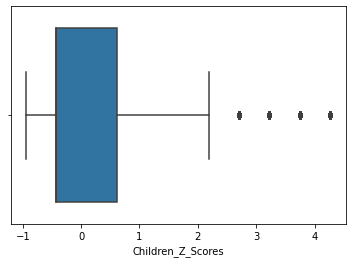

In [22]:
#Looks like age and initial_days have no outliers, but children and income do, so I'll make boxplots for those

boxplot = sns.boxplot(x = 'Children_Z_Scores', data = df)
#plt.savefig('Children Boxplot.jpg')

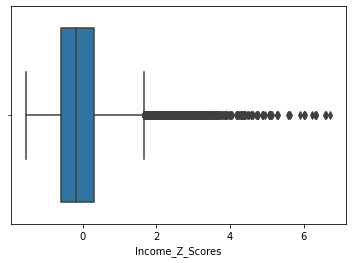

In [23]:
boxplot = sns.boxplot(x = 'Income_Z_Scores', data = df)
#plt.savefig('Income Boxplot.jpg')

In [24]:
#With age and income, I'm going to leave the outliers since both of those variables are fairly likely to be correct
#Hospitals could have more young people, then one old person come in, same with income
#Now to extract my clean data set

df.to_csv('medical_data_clean.csv')